#Importando as Bibliotecas:

In [52]:
import pandas as pd
import requests
from bs4 import BeautifulSoup as bs

import matplotlib.pyplot as plt
import seaborn as sns

#1ºParte: Coleta de dados e preparação do dataframe:

Interessante notar que cada vez que os comandos abaixo são postos para funcionar, os preços e volumes são constantemente atualizados. Isso gera uma dificuldade, mas também gera uma análise mais precisa que deve considerar a mudança dos preços.

##Fazendo requisição da API da coingecko:

In [53]:
request = requests.get("https://www.coingecko.com/en/nft").text

In [54]:
df = pd.read_html(request)

In [55]:
df1 = df[0]

In [56]:
df1

,#,NFT,Floor Price,24h,7d,Market Cap,24h Volume,Owners,24h Owners,Total Assets
0,1,dotdotdots,0.2 ETH,0.6%,NaN,974.0 ETH,"8,849.89 ETH",2648.0,0.0%,4870.0
1,2,Meebits,2.9 ETH,-7.8%,NaN,"58,000.0 ETH","5,229.36 ETH",5747.0,-0.1%,20000.0
2,3,Bored Ape Yacht Club,95.0 ETH,-7.3%,NaN,"950,000.0 ETH","1,360.59 ETH",6315.0,0.0%,10000.0
3,4,Azuki,13.99 ETH,-8.0%,NaN,"139,900.0 ETH","1,214.76 ETH",5403.0,-0.1%,10000.0
4,5,Mutant Ape Yacht Club,18.799 ETH,-7.4%,NaN,"337,630.04 ETH","1,115.09 ETH",11756.0,0.1%,17960.0
5,6,CloneX,14.5 ETH,-7.3%,NaN,"273,716.5 ETH",678.82 ETH,8292.0,0.1%,18877.0
6,7,LAND,3.66 ETH,-2.6%,NaN,"541,127.34 ETH",435.46 ETH,19727.0,0.1%,147849.0
7,8,Cool Pets,2.2 ETH,-15.6%,NaN,"40,882.6 ETH",387.58 ETH,10587.0,-0.4%,18583.0
8,9,CryptoPunks,68.94 ETH,-5.9%,NaN,"689,331.06 ETH",317.47 ETH,3390.0,0.1%,9999.0
9,10,World of Women,9.9 ETH,2.8%,NaN,"99,000.0 ETH",303.35 ETH,5073.0,-0.1%,10000.0


- Como eu quero por volta dos últimos 500 NFTs e cada página da coingecko oferece 25 nfts, preciso acessar até a página 20.

In [57]:
dfs = []
for i in range (2, 6):
  request2 = requests.get(f"https://www.coingecko.com/en/nft?page={i}").text
  df = pd.read_html(request2)
  dfs.append(df)

In [58]:
dfs

[[     #                          NFT  ... 24h Owners Total Assets
  0   26                    CrypToadz  ...       0.1%       7025.0
  1   27                   Lazy Lions  ...       0.1%      10080.0
  2   28              Crypto Unicorns  ...       0.0%      10000.0
  3   29     Sneaky Vampire Syndicate  ...       0.0%       8888.0
  4   30               Lives of Asuna  ...      -0.3%      10000.0
  5   31                     Smilesss  ...      -0.0%       8733.0
  6   32                     BYO Land  ...       0.0%      10056.0
  7   33                 inbetweeners  ...       0.1%      10777.0
  8   34                     MetaHero  ...      -2.3%       6458.0
  9   35                Capsule House  ...       0.1%      10000.0
  10  36                PudgyPenguins  ...      -0.0%       8888.0
  11  37                   CyberKongz  ...       0.0%       5000.0
  12  38                        merge  ...       0.1%      26985.0
  13  39                  OCM Dessert  ...      -0.5%         

In [59]:
len(dfs)

4

In [60]:
datasets = []
for i in range(len(dfs)):
  datasets.append(dfs[i][0])

In [61]:
len(datasets)

4

In [62]:
df_final = pd.concat([df1, datasets[0], datasets[1], datasets[2], datasets[3]], ignore_index=True)

In [63]:
df_final

,#,NFT,Floor Price,24h,7d,Market Cap,24h Volume,Owners,24h Owners,Total Assets
0,1,dotdotdots,0.2 ETH,0.6%,NaN,974.0 ETH,"8,849.89 ETH",2648.0,0.0%,4870.0
1,2,Meebits,2.9 ETH,-7.8%,NaN,"58,000.0 ETH","5,229.36 ETH",5747.0,-0.1%,20000.0
2,3,Bored Ape Yacht Club,95.0 ETH,-7.3%,NaN,"950,000.0 ETH","1,360.59 ETH",6315.0,0.0%,10000.0
3,4,Azuki,13.99 ETH,-8.0%,NaN,"139,900.0 ETH","1,214.76 ETH",5403.0,-0.1%,10000.0
4,5,Mutant Ape Yacht Club,18.799 ETH,-7.4%,NaN,"337,630.04 ETH","1,115.09 ETH",11756.0,0.1%,17960.0
...,...,...,...,...,...,...,...,...,...,...
120,121,Cometh Spaceships,0.07 ETH,-4.5%,NaN,794.99 ETH,0.07 ETH,683.0,0.1%,11357.0
121,122,Angry Apes United,0.035 ETH,45.5%,NaN,311.08 ETH,0.07 ETH,4944.0,-0.0%,8888.0
122,123,Skullx,0.028 ETH,-4.5%,NaN,280.0 ETH,0.03 ETH,2573.0,-0.1%,10000.0
123,124,Light Super Bunnies,0.009 ETH,-1.9%,NaN,40.11 ETH,0.03 ETH,1719.0,0.0%,4457.0


###Floor Price:

In [64]:
df_final['Floor Price']

0         0.2 ETH
1         2.9 ETH
2        95.0 ETH
3       13.99 ETH
4      18.799 ETH
          ...    
120      0.07 ETH
121     0.035 ETH
122     0.028 ETH
123     0.009 ETH
124      0.01 ETH
Name: Floor Price, Length: 125, dtype: object

In [65]:
prices = []
for price in df_final['Floor Price']:
  if type(price) == type('str'):
    price = price.split()
    if 'ETH' in price:
      price[0] = 0
    if len(price) == 0:
      price = [0]
  prices.append(price[0])

In [66]:
df_final['Floor Price'] = prices

In [67]:
df_final['Floor Price']

0      0
1      0
2      0
3      0
4      0
      ..
120    0
121    0
122    0
123    0
124    0
Name: Floor Price, Length: 125, dtype: int64

In [68]:
df_final['Floor Price'] = df_final['Floor Price'].astype(float)

###Market Cap:

In [69]:
df_final['Market Cap']

0           974.0 ETH
1        58,000.0 ETH
2       950,000.0 ETH
3       139,900.0 ETH
4      337,630.04 ETH
            ...      
120        794.99 ETH
121        311.08 ETH
122         280.0 ETH
123         40.11 ETH
124         88.88 ETH
Name: Market Cap, Length: 125, dtype: object

In [70]:
market_caps = []
for market_cap in df_final['Market Cap']:
  market_cap = market_cap.split()
  market_caps.append(market_cap[0])

In [71]:
for i in market_caps:
  if type(i) != type('str'):
    print('Não tem dados com tipo string')

In [72]:
market_caps_final = []
for mks in market_caps:
  mks = mks.split(',')
  if len(mks) > 1:
    mks = mks[0] + '' + mks[1]
    market_caps_final.append(mks)
  else:
    market_caps_final.append(mks[0])


In [73]:
df_final['Market Cap'] = market_caps_final

In [74]:
market_caps_final = df_final['Market Cap'].astype(float)

###24h(Variação em %):

In [75]:
df_final = df_final.rename(columns={'24h':'24h(%)'})

In [76]:
df_final.head()

,#,NFT,Floor Price,24h(%),7d,Market Cap,24h Volume,Owners,24h Owners,Total Assets
0,1,dotdotdots,0.0,0.6%,NaN,974.0,"8,849.89 ETH",2648.0,0.0%,4870.0
1,2,Meebits,0.0,-7.8%,NaN,58000.0,"5,229.36 ETH",5747.0,-0.1%,20000.0
2,3,Bored Ape Yacht Club,0.0,-7.3%,NaN,950000.0,"1,360.59 ETH",6315.0,0.0%,10000.0
3,4,Azuki,0.0,-8.0%,NaN,139900.0,"1,214.76 ETH",5403.0,-0.1%,10000.0
4,5,Mutant Ape Yacht Club,0.0,-7.4%,NaN,337630.04,"1,115.09 ETH",11756.0,0.1%,17960.0


In [77]:
tfhours = []
try:
  for per in df_final['24h(%)']:
    per = per.split('%')
    tfhours.append(float(per[0]))
except:
  print("not valid")

In [78]:
if len(tfhours) > 0:
  df_final['24h(%)'] = tfhours

In [79]:
df_final.head()

,#,NFT,Floor Price,24h(%),7d,Market Cap,24h Volume,Owners,24h Owners,Total Assets
0,1,dotdotdots,0.0,0.6,NaN,974.0,"8,849.89 ETH",2648.0,0.0%,4870.0
1,2,Meebits,0.0,-7.8,NaN,58000.0,"5,229.36 ETH",5747.0,-0.1%,20000.0
2,3,Bored Ape Yacht Club,0.0,-7.3,NaN,950000.0,"1,360.59 ETH",6315.0,0.0%,10000.0
3,4,Azuki,0.0,-8.0,NaN,139900.0,"1,214.76 ETH",5403.0,-0.1%,10000.0
4,5,Mutant Ape Yacht Club,0.0,-7.4,NaN,337630.04,"1,115.09 ETH",11756.0,0.1%,17960.0


###24h Volume:

In [80]:
df_final['24h Volume']

0      8,849.89 ETH
1      5,229.36 ETH
2      1,360.59 ETH
3      1,214.76 ETH
4      1,115.09 ETH
           ...     
120        0.07 ETH
121        0.07 ETH
122        0.03 ETH
123        0.03 ETH
124        0.02 ETH
Name: 24h Volume, Length: 125, dtype: object

In [81]:
daily_volumes  = []
for daily_volume in df_final['24h Volume']:
  if ',' in daily_volume:
    daily_volume = daily_volume.split(',')
    daily_volume = daily_volume[0] + '' + daily_volume[1]
    daily_volume = daily_volume.split()
    daily_volumes.append(daily_volume[0])
  else:  
    daily_volume = daily_volume.split()
    daily_volume = daily_volume[0]
    daily_volumes.append(daily_volume)


In [82]:
daily_volumes
    

['8849.89',
 '5229.36',
 '1360.59',
 '1214.76',
 '1115.09',
 '678.82',
 '435.46',
 '387.58',
 '317.47',
 '303.35',
 '256.47',
 '187.02',
 '125.47',
 '125.27',
 '116.69',
 '109.38',
 '106.96',
 '78.17',
 '76.43',
 '75.13',
 '62.51',
 '61.11',
 '60.23',
 '59.51',
 '58.53',
 '56.7',
 '52.41',
 '47.17',
 '43.49',
 '41.18',
 '39.35',
 '36.84',
 '30.24',
 '30.0',
 '29.9',
 '28.35',
 '27.46',
 '26.85',
 '26.1',
 '25.14',
 '24.71',
 '24.62',
 '23.86',
 '23.34',
 '21.96',
 '21.94',
 '21.58',
 '21.58',
 '20.17',
 '18.58',
 '18.14',
 '17.2',
 '17.09',
 '16.18',
 '15.69',
 '14.89',
 '14.27',
 '13.36',
 '12.76',
 '12.46',
 '7.16',
 '6.63',
 '6.46',
 '6.4',
 '6.38',
 '5.88',
 '5.83',
 '5.6',
 '5.59',
 '5.29',
 '5.2',
 '3.93',
 '3.65',
 '3.5',
 '3.47',
 '3.32',
 '3.17',
 '3.1',
 '2.48',
 '2.45',
 '2.33',
 '2.24',
 '2.22',
 '1.86',
 '1.73',
 '1.72',
 '1.69',
 '1.67',
 '1.54',
 '1.48',
 '1.31',
 '1.25',
 '0.96',
 '0.8',
 '0.62',
 '0.61',
 '0.55',
 '0.48',
 '0.42',
 '0.4',
 '0.39',
 '0.39',
 '0.36',
 '0

In [83]:
df_final['24h Volume'] = daily_volumes

In [84]:
df_final['24h Volume'].astype(float)

0      8849.89
1      5229.36
2      1360.59
3      1214.76
4      1115.09
        ...   
120       0.07
121       0.07
122       0.03
123       0.03
124       0.02
Name: 24h Volume, Length: 125, dtype: float64

###24h Owners:

In [85]:
df_final['24h Owners']

0       0.0%
1      -0.1%
2       0.0%
3      -0.1%
4       0.1%
       ...  
120     0.1%
121    -0.0%
122    -0.1%
123     0.0%
124     0.0%
Name: 24h Owners, Length: 125, dtype: object

In [86]:
daily_owners = []
for d_owner in df_final['24h Owners']:
  d_owner = d_owner.split('%')
  daily_owners.append(d_owner[0])

In [87]:
df_final['24h Owners'] = daily_owners

In [88]:
len(daily_owners)

125

In [89]:
for els in df_final['24h Owners']:
  if type(els) != type('str'):
    df_final['24h Owners'].astype(float)

##Razão dos proprietários (Owner Ratio):

In [90]:
df_final['Owner Ratio'] = df_final['Owners'] / df_final ['Total Assets']

In [91]:
df_final['Owner Ratio'] = df_final['Owner Ratio']*100

#2ºParte: Limpeza dos dados

In [92]:
df_final.isnull().sum()

#                 0
NFT               0
Floor Price       0
24h(%)            0
7d              125
Market Cap        0
24h Volume        0
Owners            0
24h Owners        0
Total Assets      0
Owner Ratio       0
dtype: int64

In [93]:
df_final.drop(columns=["7d", "#"], inplace=True)

In [94]:
df_final.duplicated().sum()

0

In [95]:
df = df_final

#Salvando em CSV:

In [96]:
df.to_csv(r'/content/df_final.csv', index=False, header=True)

In [97]:
df_test = pd.read_csv("df_final.csv")

In [191]:
df_test.head()

,NFT,Floor Price,24h(%),Market Cap,24h Volume,Owners,24h Owners,Total Assets,Owner Ratio
0,dotdotdots,0.0,0.6,974.00,8849.89,2648.0,0.0,4870.0,54.373717
1,Meebits,0.0,-7.8,58000.00,5229.36,5747.0,-0.1,20000.0,28.735000
2,Bored Ape Yacht Club,0.0,-7.3,950000.00,1360.59,6315.0,0.0,10000.0,63.150000
3,Azuki,0.0,-8.0,139900.00,1214.76,5403.0,-0.1,10000.0,54.030000
4,Mutant Ape Yacht Club,0.0,-7.4,337630.04,1115.09,11756.0,0.1,17960.0,65.456570


#A continuação das partes será imediata para aproveitar a sincronicidade via API do dataset. No entanto, deixo o dataset salvo pós-tratamento para qualquer motivo que seja.

#3ºParte: Análise do dataframe




##Importando as bibliotecas:

In [99]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

##Importando o dataset:

In [100]:
df = pd.read_csv("df_final_sample.csv")


In [101]:
df = df_final.copy()

##Quais colunas nos interessam?

In [102]:
df.columns

Index(['NFT', 'Floor Price', '24h(%)', 'Market Cap', '24h Volume', 'Owners',
       '24h Owners', 'Total Assets', 'Owner Ratio'],
      dtype='object')

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   NFT           125 non-null    object 
 1   Floor Price   125 non-null    float64
 2   24h(%)        125 non-null    float64
 3   Market Cap    125 non-null    object 
 4   24h Volume    125 non-null    object 
 5   Owners        125 non-null    float64
 6   24h Owners    125 non-null    object 
 7   Total Assets  125 non-null    float64
 8   Owner Ratio   125 non-null    float64
dtypes: float64(5), object(4)
memory usage: 8.9+ KB


In [104]:
df.head()

,NFT,Floor Price,24h(%),Market Cap,24h Volume,Owners,24h Owners,Total Assets,Owner Ratio
0,dotdotdots,0.0,0.6,974.0,8849.89,2648.0,0.0,4870.0,54.373717
1,Meebits,0.0,-7.8,58000.0,5229.36,5747.0,-0.1,20000.0,28.735000
2,Bored Ape Yacht Club,0.0,-7.3,950000.0,1360.59,6315.0,0.0,10000.0,63.150000
3,Azuki,0.0,-8.0,139900.0,1214.76,5403.0,-0.1,10000.0,54.030000
4,Mutant Ape Yacht Club,0.0,-7.4,337630.04,1115.09,11756.0,0.1,17960.0,65.456570


In [105]:
df.tail()

,NFT,Floor Price,24h(%),Market Cap,24h Volume,Owners,24h Owners,Total Assets,Owner Ratio
120,Cometh Spaceships,0.0,-4.5,794.99,0.07,683.0,0.1,11357.0,6.013912
121,Angry Apes United,0.0,45.5,311.08,0.07,4944.0,-0.0,8888.0,55.625563
122,Skullx,0.0,-4.5,280.0,0.03,2573.0,-0.1,10000.0,25.730000
123,Light Super Bunnies,0.0,-1.9,40.11,0.03,1719.0,0.0,4457.0,38.568544
124,Spookies,0.0,-4.4,88.88,0.02,2677.0,0.0,8888.0,30.119262


In [106]:
df.corr(method="pearson")

,Floor Price,24h(%),Owners,Total Assets,Owner Ratio
Floor Price,NaN,NaN,NaN,NaN,NaN
24h(%),NaN,1.000000,0.006619,0.151141,0.350773
Owners,NaN,0.006619,1.000000,0.462886,0.030639
Total Assets,NaN,0.151141,0.462886,1.000000,-0.075766
Owner Ratio,NaN,0.350773,0.030639,-0.075766,1.000000


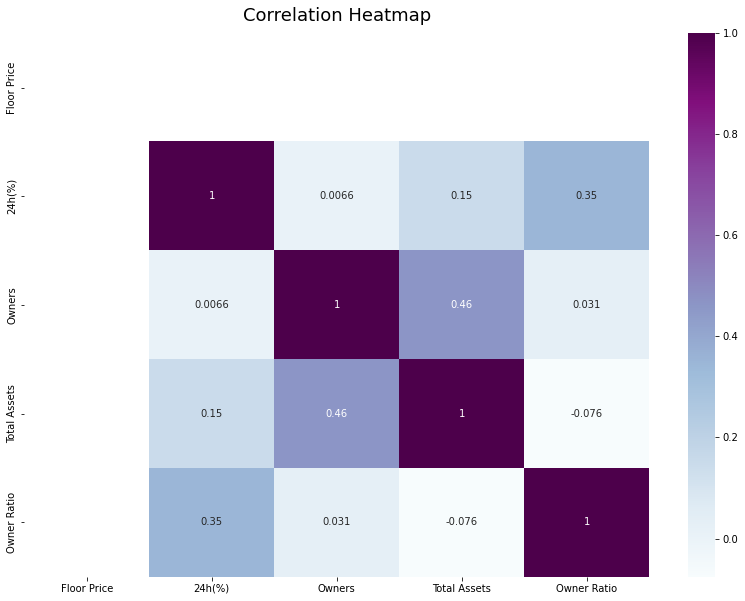

In [107]:
plt.figure(figsize=(14,10))
heatmap = sns.heatmap(df.corr(), cmap="BuPu", annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

##Análise de cada coluna:

###Floor Price:

In [108]:
df['Floor Price']

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
120    0.0
121    0.0
122    0.0
123    0.0
124    0.0
Name: Floor Price, Length: 125, dtype: float64

In [109]:
df['Floor Price'].describe()

count    125.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: Floor Price, dtype: float64

In [110]:
df2 = df[df['Floor Price'] < 80]

In [111]:
df2['Floor Price'].describe()

count    125.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: Floor Price, dtype: float64

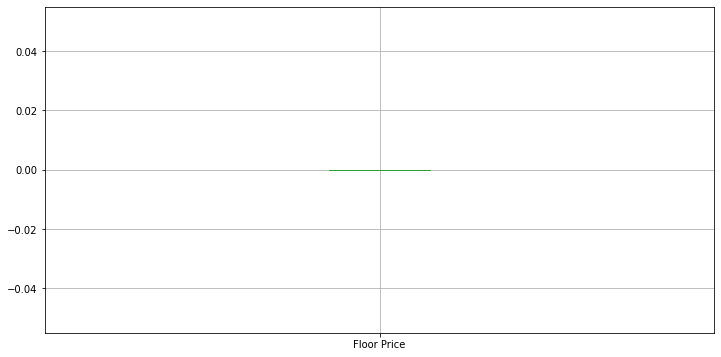

In [112]:
plt.figure(figsize=(12,6))
df2.boxplot('Floor Price')
plt.show()

- Os dados estão concentrados por volta de 0 e 5 ETH. O que nos indica lançamentos baixos, exceto por alguns outliers discrepantes.

####Visualização dos dados:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


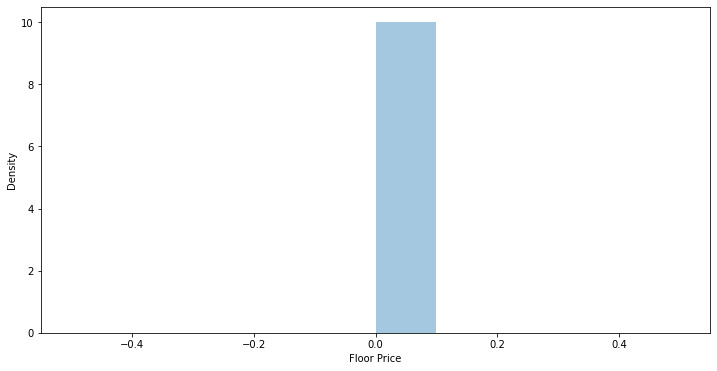

In [113]:
plt.figure(figsize=(12,6))
sns.distplot(df['Floor Price'], bins=10)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


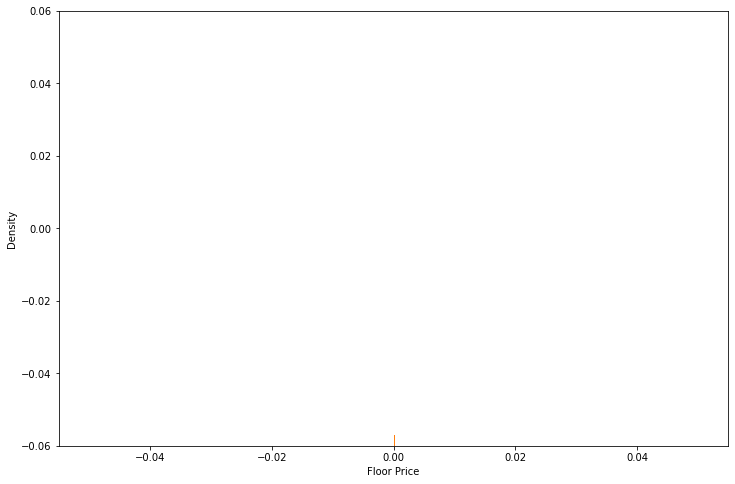

In [114]:
plt.figure(figsize=(12,8))
sns.kdeplot(df['Floor Price'])
sns.rugplot(df['Floor Price'])

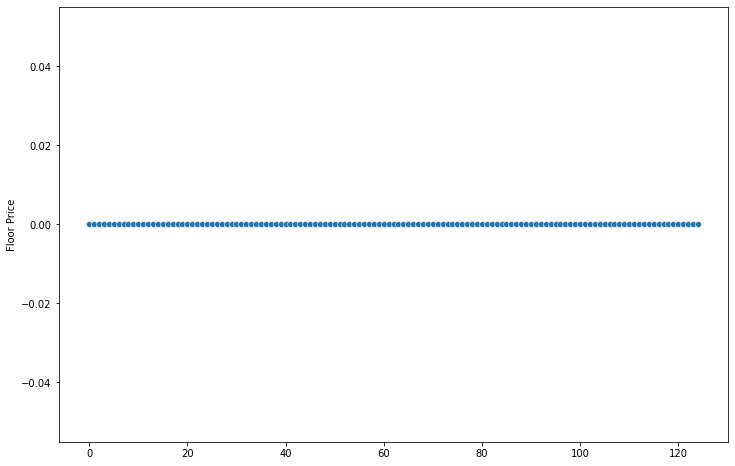

In [115]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df['Floor Price'])

###Variação nas últimas 24 horas:

- Essa coluna não nos informa muito sobre o dataset de um modo geral, visto que para termos uma informação de qualidade, sempre terá de ser dinâmica a relação mética fornecida nessa coluna, por isso as informações de estatística descritiva serão suficiente

In [116]:
df['24h(%)']

0       0.6
1      -7.8
2      -7.3
3      -8.0
4      -7.4
       ... 
120    -4.5
121    45.5
122    -4.5
123    -1.9
124    -4.4
Name: 24h(%), Length: 125, dtype: float64

In [117]:
df[df['24h(%)'] == 904]

,NFT,Floor Price,24h(%),Market Cap,24h Volume,Owners,24h Owners,Total Assets,Owner Ratio


- É possível sabermos os NFTs que tem um crescimento nas últimas 24 horas acima da média:

In [118]:
df_mean24h = df[df['24h(%)'] > df['24h(%)'].mean() ]

In [119]:
df_mean24h.describe()

,Floor Price,24h(%),Owners,Total Assets,Owner Ratio
count,39.0,39.000000,39.000000,39.000000,39.000000
mean,0.0,17.305128,4201.717949,9650.179487,2678.390849
std,0.0,32.160935,4987.824428,7290.243711,15266.467075
min,0.0,-1.200000,481.000000,3.000000,4.810000
25%,0.0,1.100000,2675.000000,8462.500000,30.403947
50%,0.0,5.000000,3401.000000,9995.000000,39.565466
75%,0.0,15.050000,4638.500000,10000.000000,51.261027
max,0.0,167.400000,32732.000000,46169.000000,95266.666667


Essas informações são bem interessantes:
- Se olhar o count do df_mean24h['Floor Price'], veremos que X NFTs dos 125 tem crescimento das últimas 24 horas acima da média
- Assim como mean do df_mean24h['Floor Price'] nos indicará Y ETH é a média do Floor Price

####Visualização de dados:

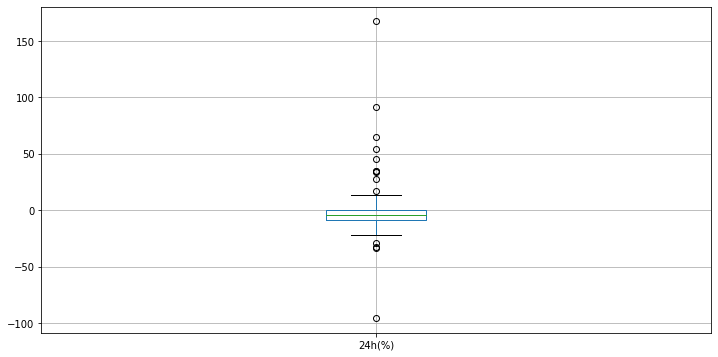

In [120]:
plt.figure(figsize=(12,6))
df.boxplot('24h(%)')
plt.show()

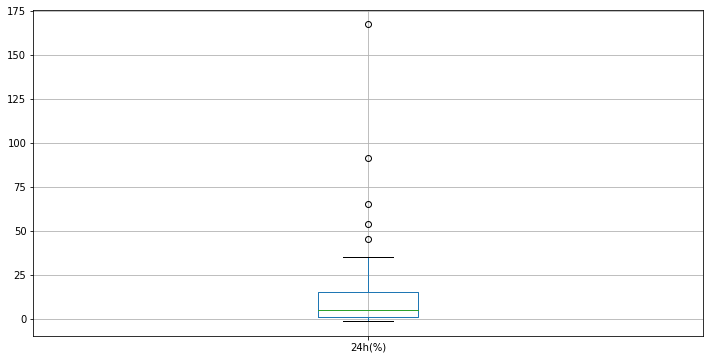

In [121]:
plt.figure(figsize=(12,6))
df_mean24h.boxplot('24h(%)')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


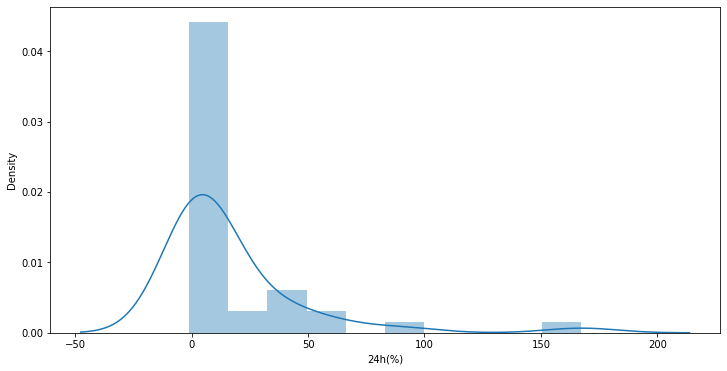

In [122]:
plt.figure(figsize=(12,6))
sns.distplot(df_mean24h['24h(%)'], bins=10)

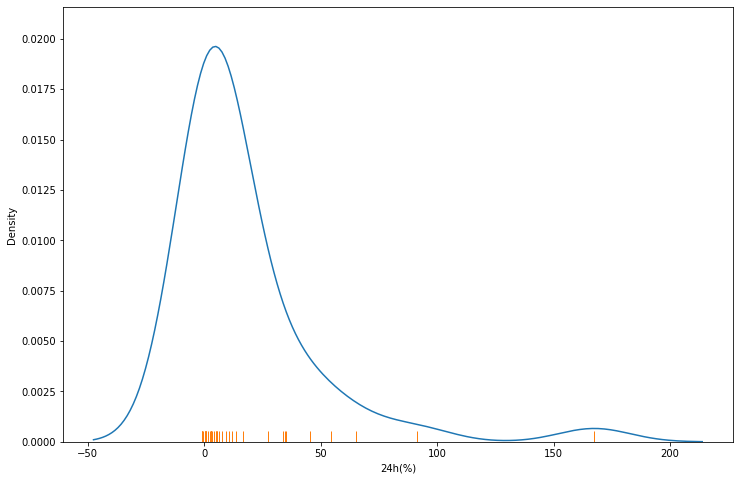

In [123]:
plt.figure(figsize=(12,8))
sns.kdeplot(df_mean24h['24h(%)'])
sns.rugplot(df_mean24h['24h(%)'])

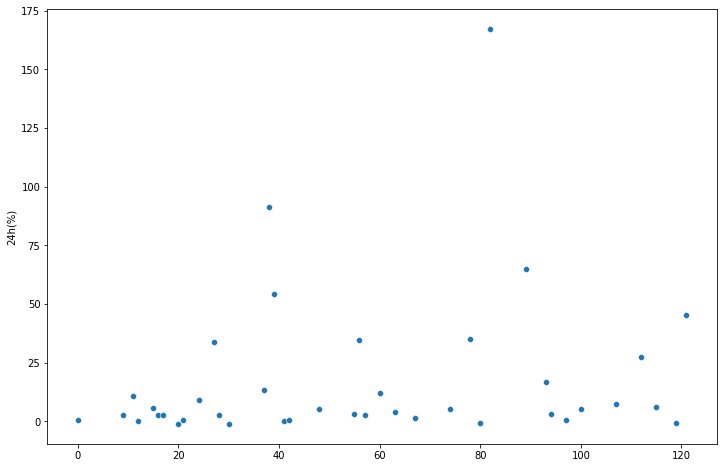

In [124]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df_mean24h['24h(%)'])

- O Floor Price desses projetos com crescimento acima da média:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


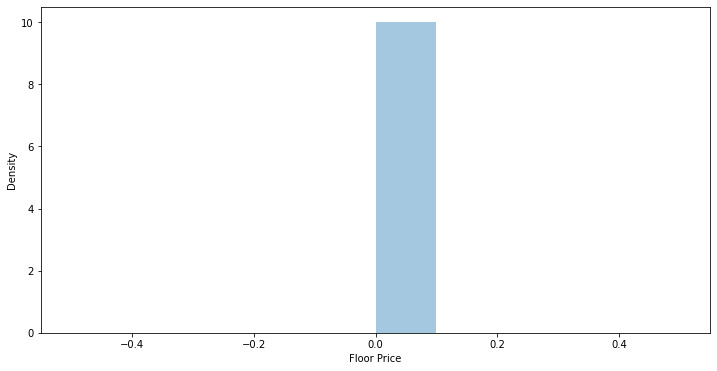

In [125]:
plt.figure(figsize=(12,6))
sns.distplot(df_mean24h['Floor Price'], bins=10)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


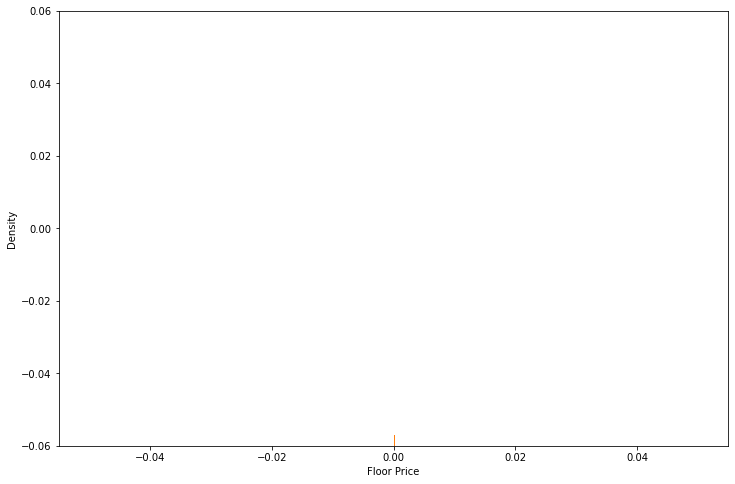

In [126]:
plt.figure(figsize=(12,8))
sns.kdeplot(df_mean24h['Floor Price'])
sns.rugplot(df_mean24h['Floor Price'])

###Market Cap:

In [127]:
df['Market Cap'] = df['Market Cap'].astype(float)

In [128]:
df['Market Cap'].describe()

count       125.000000
mean      33928.527520
std      120917.153569
min           2.530000
25%         755.480000
50%        2500.000000
75%       12800.000000
max      950000.000000
Name: Market Cap, dtype: float64

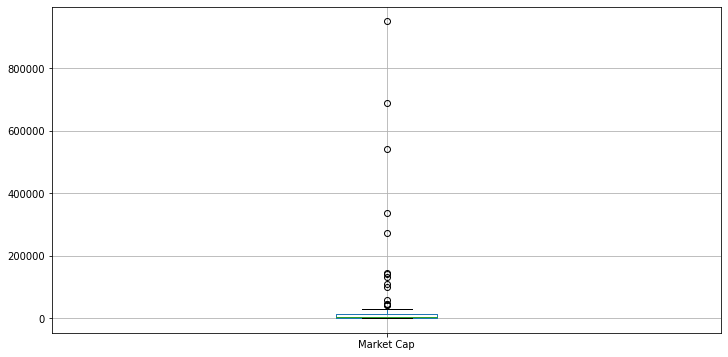

In [129]:
plt.figure(figsize=(12,6))
df.boxplot('Market Cap')
plt.show()

####Visualização de dados:

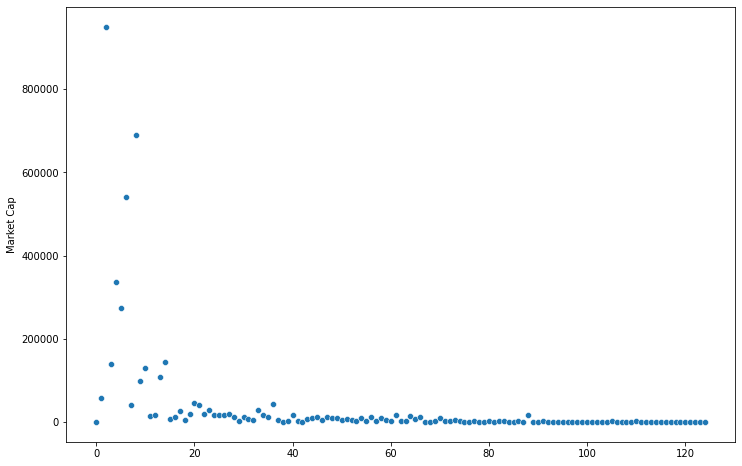

In [130]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df['Market Cap'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


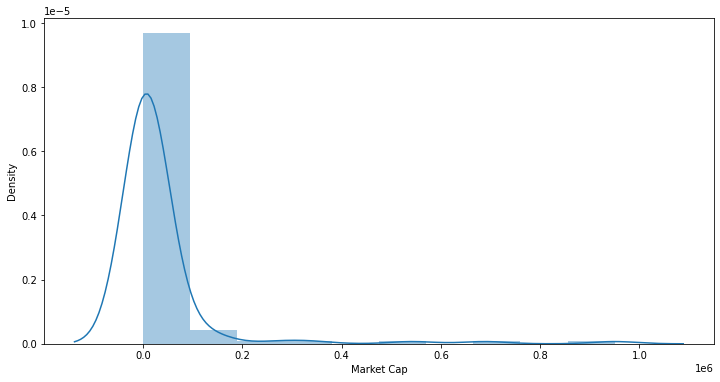

In [131]:
plt.figure(figsize=(12,6))
sns.distplot(df['Market Cap'], bins=10)

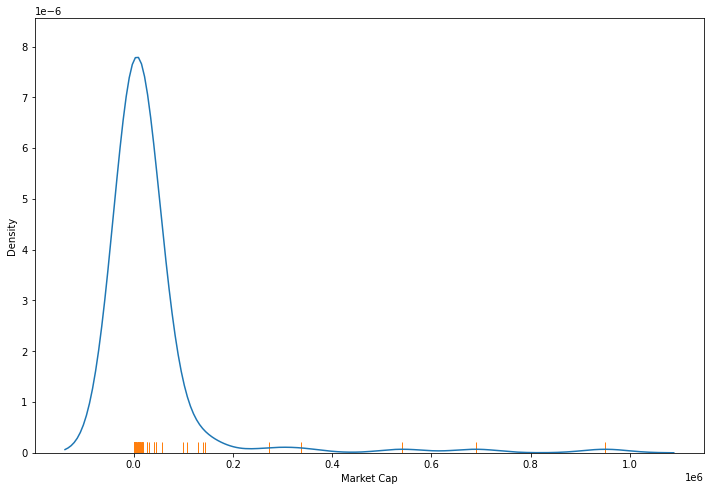

In [132]:
plt.figure(figsize=(12,8))
sns.kdeplot(df['Market Cap'])
sns.rugplot(df['Market Cap'])

In [133]:
df[df['Market Cap'] < 13587].describe()

,Floor Price,24h(%),Market Cap,Owners,Total Assets,Owner Ratio
count,94.0,94.000000,94.000000,94.000000,94.000000,94.000000
mean,0.0,-0.428723,3159.220745,3563.563830,9026.882979,1134.412363
std,0.0,26.806285,3824.033577,3545.120055,6429.024266,9845.787604
min,0.0,-95.500000,2.530000,293.000000,3.000000,6.013912
25%,0.0,-8.725000,485.112500,1849.000000,5137.500000,30.352196
50%,0.0,-4.500000,1290.360000,3060.500000,8888.000000,38.941415
75%,0.0,1.300000,4428.670000,4419.500000,10000.000000,50.645210
max,0.0,167.400000,12800.000000,32732.000000,46169.000000,95266.666667


In [134]:
df_cap = df[df['Market Cap'] < 13587]

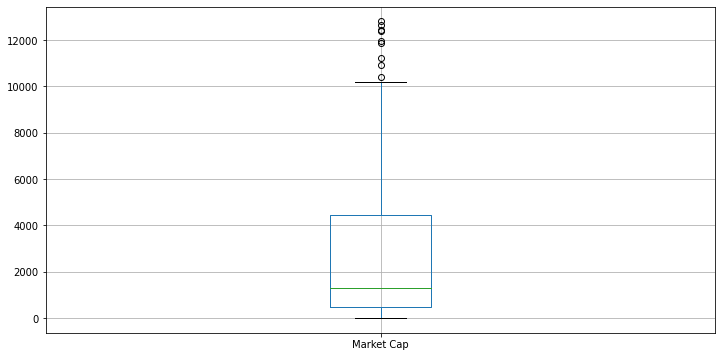

In [135]:
plt.figure(figsize=(12,6))
df_cap.boxplot('Market Cap')
plt.show()

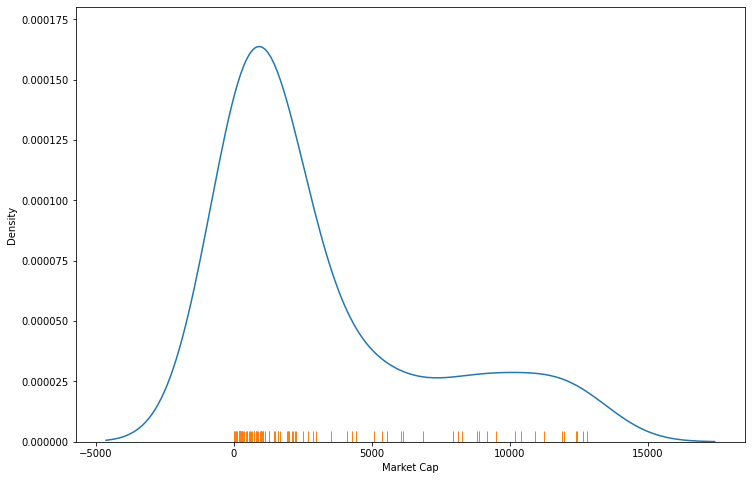

In [136]:
plt.figure(figsize=(12,8))
sns.kdeplot(df_cap['Market Cap'])
sns.rugplot(df_cap['Market Cap'])

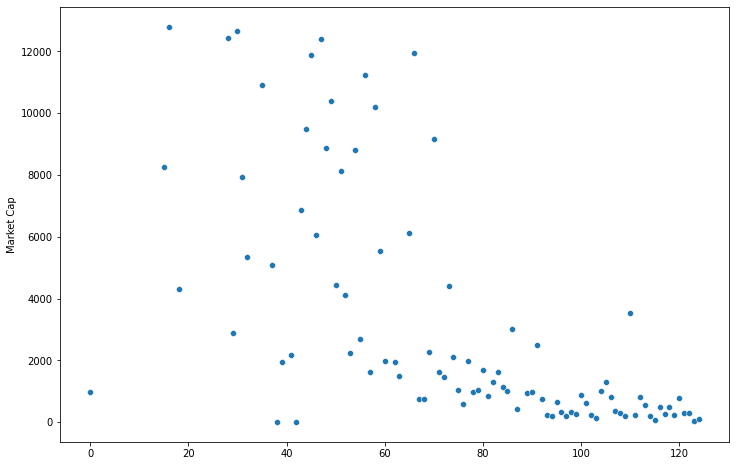

In [137]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df_cap['Market Cap'])

###Owners

In [138]:
df['Owners'].head()

0     2648.0
1     5747.0
2     6315.0
3     5403.0
4    11756.0
Name: Owners, dtype: float64

In [139]:
df['Owners'].tail()

120     683.0
121    4944.0
122    2573.0
123    1719.0
124    2677.0
Name: Owners, dtype: float64

In [140]:
df['Owners'].describe()

count      125.00000
mean      3958.62400
std       3670.41917
min        293.00000
25%       2095.00000
50%       3398.00000
75%       5045.00000
max      32732.00000
Name: Owners, dtype: float64

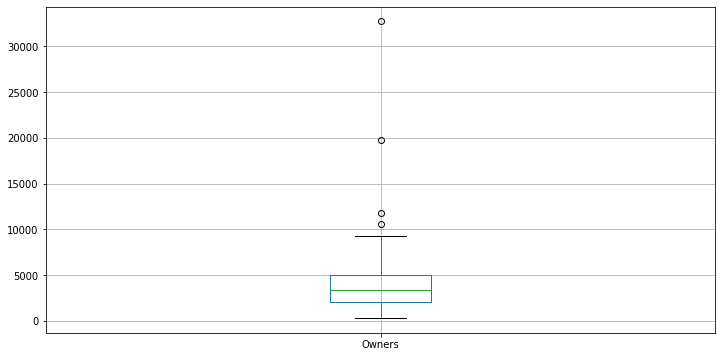

In [141]:
plt.figure(figsize=(12,6))
df.boxplot('Owners')
plt.show()

####Visualizações de dados:

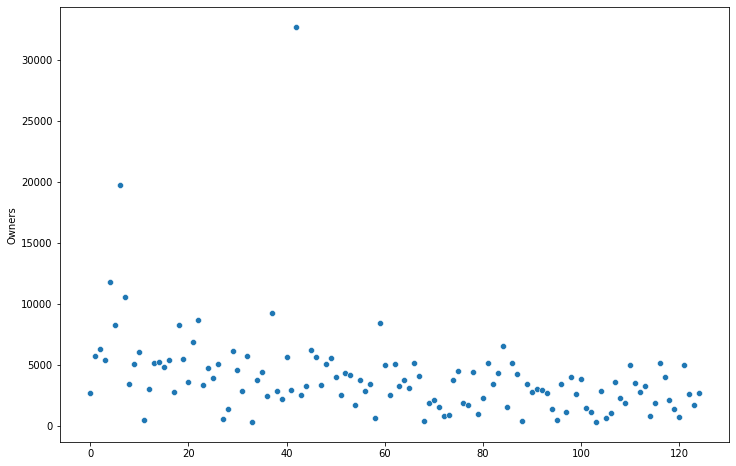

In [142]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df['Owners'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


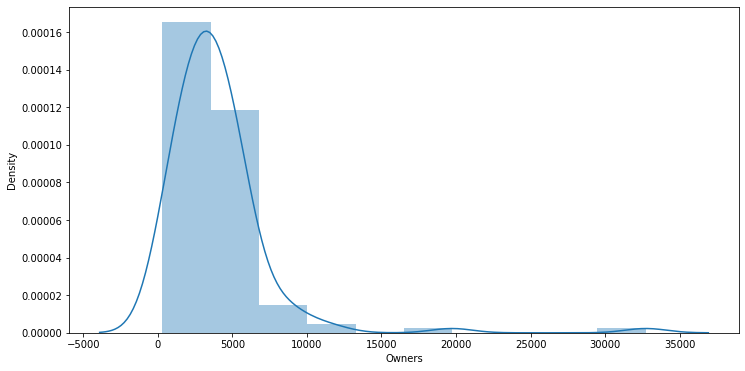

In [143]:
plt.figure(figsize=(12,6))
sns.distplot(df["Owners"], bins=10)

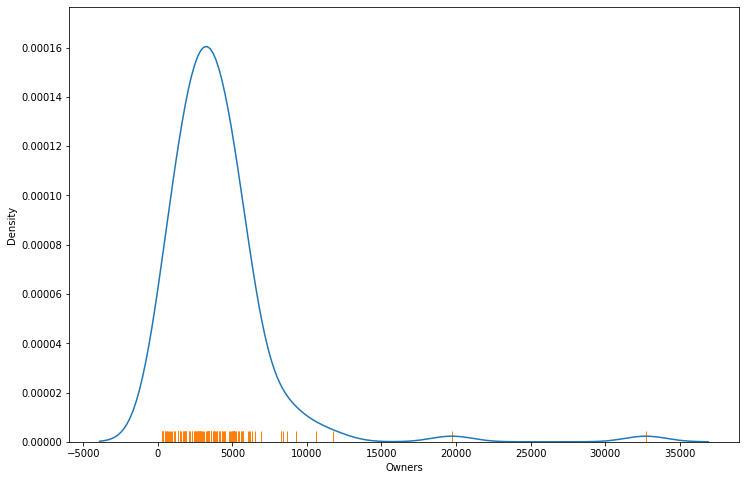

In [144]:
plt.figure(figsize=(12,8))
sns.kdeplot(df['Owners'])
sns.rugplot(df['Owners'])

###Total Assets

In [145]:
df['Total Assets'].head()

0     4870.0
1    20000.0
2    10000.0
3    10000.0
4    17960.0
Name: Total Assets, dtype: float64

In [146]:
df['Total Assets'].tail()

120    11357.0
121     8888.0
122    10000.0
123     4457.0
124     8888.0
Name: Total Assets, dtype: float64

In [147]:
df['Total Assets'].describe()

count       125.000000
mean      10695.536000
std       13763.084109
min           3.000000
25%        7231.000000
50%        9999.000000
75%       10000.000000
max      147849.000000
Name: Total Assets, dtype: float64

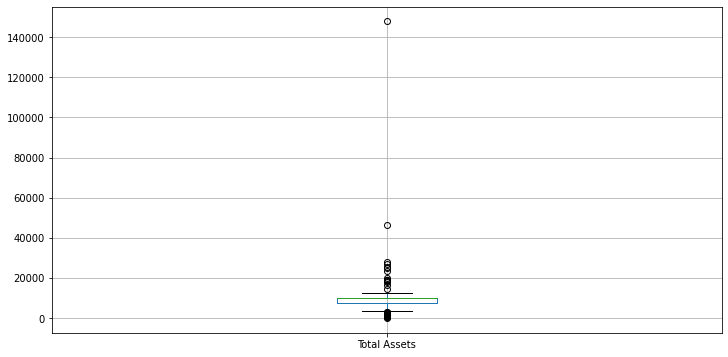

In [148]:
plt.figure(figsize=(12,6))
df.boxplot('Total Assets')
plt.show()

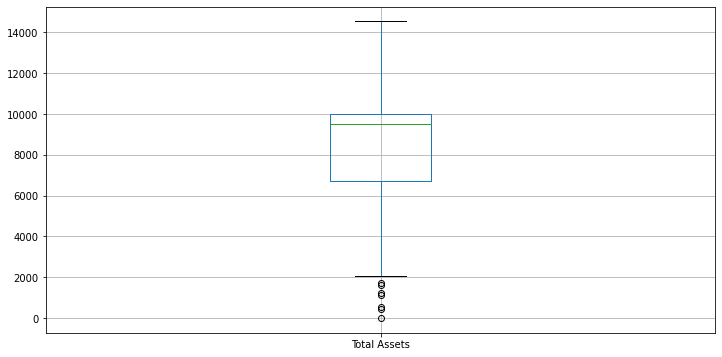

In [149]:
plt.figure(figsize=(12,6))
df[df['Total Assets'] < 15000].boxplot('Total Assets')
plt.show()

- A maior parte dos projetos tem até 15000 NFTs.

In [150]:
df_assets = df[df['Total Assets'] < 15000]
df_assets['Total Assets'].describe()

count      111.000000
mean      7971.918919
std       3052.920736
min          3.000000
25%       6700.000000
50%       9500.000000
75%      10000.000000
max      14533.000000
Name: Total Assets, dtype: float64

####Visualização de dados:

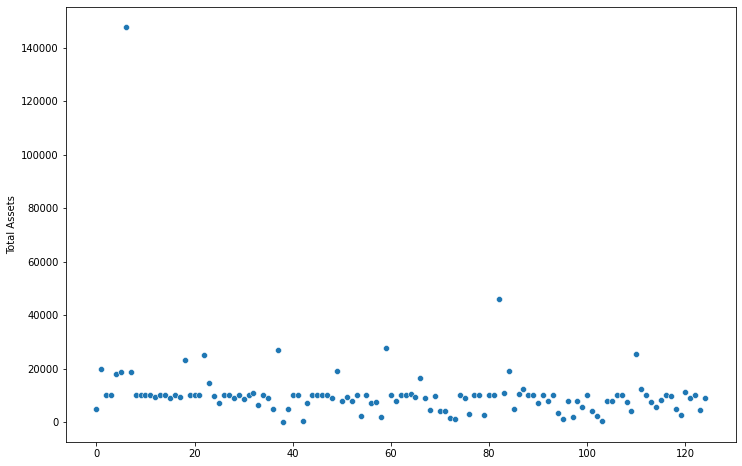

In [151]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df['Total Assets'])

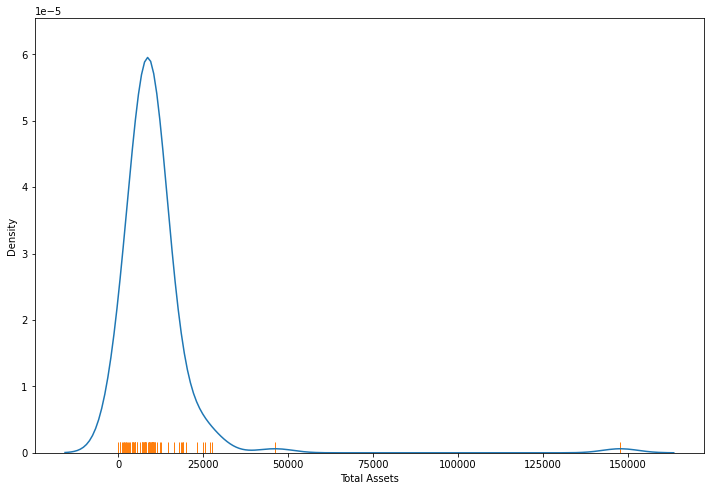

In [152]:
plt.figure(figsize=(12,8))
sns.kdeplot(df['Total Assets'])
sns.rugplot(df['Total Assets'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


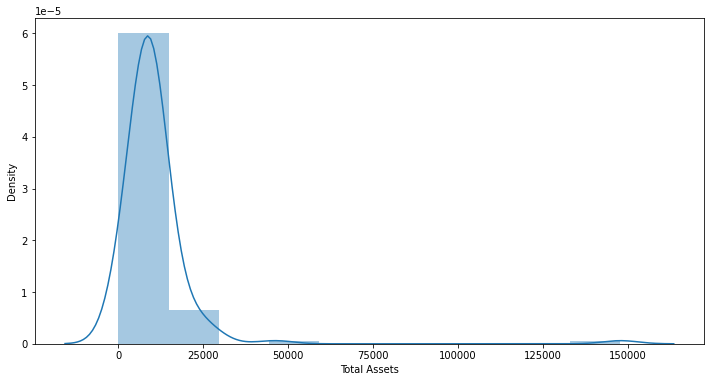

In [153]:
plt.figure(figsize=(12,6))
sns.distplot(df["Total Assets"], bins=10)

- Visualizações com filtragem feita:

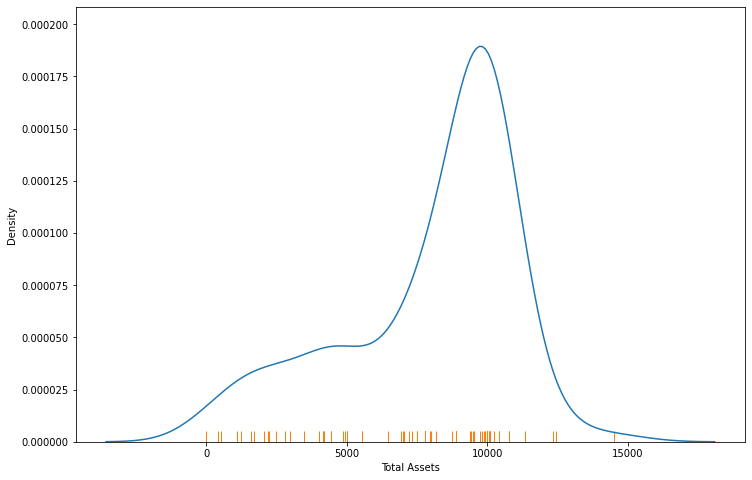

In [155]:
plt.figure(figsize=(12,8))
sns.kdeplot(df_assets['Total Assets'])
sns.rugplot(df_assets['Total Assets'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


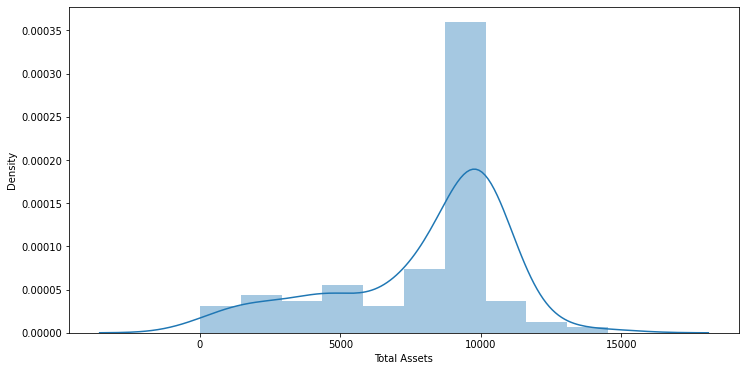

In [156]:
plt.figure(figsize=(12,6))
sns.distplot(df_assets["Total Assets"], bins=10)

###Owner Ratio:

In [157]:
df['Owner Ratio'].describe()

count      125.000000
mean       862.956141
std       8539.905235
min          3.500000
25%         30.320427
50%         39.314286
75%         50.887346
max      95266.666667
Name: Owner Ratio, dtype: float64

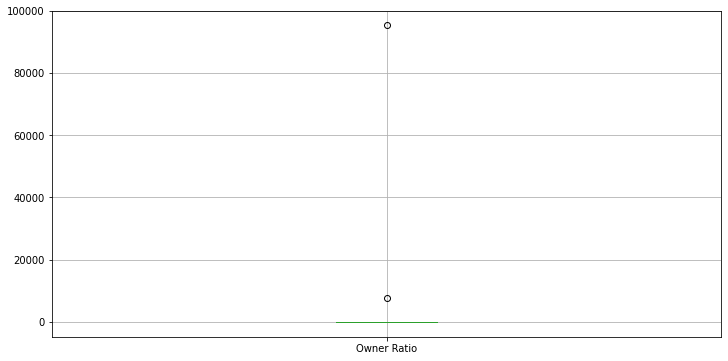

In [158]:
plt.figure(figsize=(12,6))
df.boxplot('Owner Ratio')
plt.show()

- Poucos outliers com considerações fortes.

In [159]:
df_ratio = df[df['Owner Ratio'] < 2500]
df_ratio

,NFT,Floor Price,24h(%),Market Cap,24h Volume,Owners,24h Owners,Total Assets,Owner Ratio
0,dotdotdots,0.0,0.6,974.00,8849.89,2648.0,0.0,4870.0,54.373717
1,Meebits,0.0,-7.8,58000.00,5229.36,5747.0,-0.1,20000.0,28.735000
2,Bored Ape Yacht Club,0.0,-7.3,950000.00,1360.59,6315.0,0.0,10000.0,63.150000
3,Azuki,0.0,-8.0,139900.00,1214.76,5403.0,-0.1,10000.0,54.030000
4,Mutant Ape Yacht Club,0.0,-7.4,337630.04,1115.09,11756.0,0.1,17960.0,65.456570
...,...,...,...,...,...,...,...,...,...
120,Cometh Spaceships,0.0,-4.5,794.99,0.07,683.0,0.1,11357.0,6.013912
121,Angry Apes United,0.0,45.5,311.08,0.07,4944.0,-0.0,8888.0,55.625563
122,Skullx,0.0,-4.5,280.00,0.03,2573.0,-0.1,10000.0,25.730000
123,Light Super Bunnies,0.0,-1.9,40.11,0.03,1719.0,0.0,4457.0,38.568544


In [160]:
df_ratio['Owner Ratio'].describe()

count    123.000000
mean      39.252269
std       15.474928
min        3.500000
25%       30.219845
50%       38.568544
75%       50.863403
max       78.190045
Name: Owner Ratio, dtype: float64

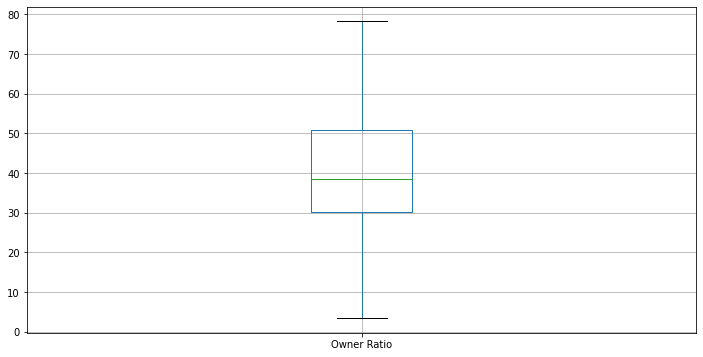

In [161]:
plt.figure(figsize=(12,6))
df_ratio.boxplot('Owner Ratio')
plt.show()

#4ºParte: Analisando as relações do início:

##Premissas:

1. O market cap é o que entenderíamos pela receita total do projeto.  No entanto, muitos indicadores (incluindo a coingecko), simplesmente multiplicam a quantidade de NFTs (total assets) pelo preço do NFT mais baixo (floor price), o que significa que não é exatamente confiável. O market cap é o melhor parâmetro para entender o crescimento do projeto a longo prazo e o seu sucesso, porém, como tudo em finanças, não é uma medida exata, existem diversos outros fatores que garantem o sucesso de um projeto.

2. Podemos considerar, por ser os top projetos NFTs, que eles deram sold out, ou seja, eles foram completamente vendidos. Por que isso é relevante? Quando um projeto tem todos seus NFTs vendidos, ele é considerado um bom projeto e o seu floor price se estabiliza, na maioria das vezes. Não é incomum um projeto estar completamente vendido.

3. Como busco identificar quais projetos se destacam de alguma maneira e quais indicadores a maior parte dos projetos possuem, as colunas que devem ser ressaltadas são: o floor price, market cap e owners (preço de "chão" (preço do NFT mais barato), receita do projeto e os proprietários).


##Hipóteses e demonstrações:


###O market cap é verdadeiro?

- Muitos sites são conhecidos por não apresentar um market cap correto. O que posso fazer para verificar essa informação? Sei que, no mínimo, o market cap vai ser maior do que Total_assets (total de ativos) multiplicado floor_price (o preço do NFT mais baixo do projeto). 

In [162]:
total_assets = []
floor_price = []

for price in df['Floor Price']:
  floor_price.append(price)

for asset in df['Total Assets']:
  total_assets.append(asset)


In [163]:
makt_caps = []
for i in range(len(total_assets)):
  makt_cap = floor_price[i]*total_assets[i]
  makt_caps.append(makt_cap)

In [164]:
makt_caps2 = []
for makt_cap in df['Market Cap']:
  makt_caps2.append(makt_cap)

In [165]:
larger = []
equal = []
smaller = []

flag=0
for i in range(len(makt_caps)):
  if makt_caps[i] == makt_caps2[i]:
    flag = 1
    equal.append(flag)
  elif makt_caps[i] > makt_caps2[i]:
    flag = 2
    equal.append(flag)
  elif makt_caps[i] < makt_caps2[i]:
    flag = 3
    smaller.append(flag)

- As flags indicam se o market cap do dataset é igual, menor ou maior que a multiplicação dos ativos totais do projeto com o floor price.

In [166]:
print(len(equal), len(smaller), len(larger))

0 125 0


- Aqui temos as relações. No dia 10/02, encontrei nenhum market cap maior que a multiplicação e inclusive, 19 marketcaps eram menores do que a relação floor_price * total_assets, o que indica que ele é *menor* do que o mínimo esperado. Portanto, o que indica que essa coluna não é verídica. No entanto, é importante ressaltar que não é um dado descartável visto que a maior parte (106) dos market caps indicam o market cap *mínimo*. O que podemos saber é que ele não é o verdadeiro market cap do projeto.

###Relações do floor price:

In [167]:
df_fp = pd.DataFrame([df['Floor Price'], df['Market Cap']])

In [168]:
df_fp = df_fp.transpose()

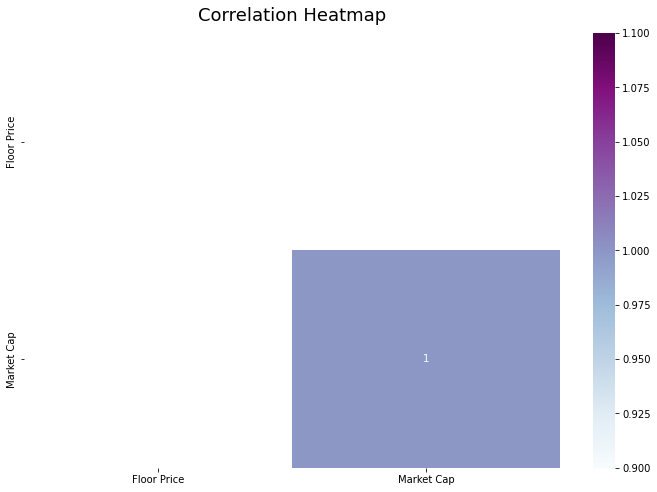

In [190]:
plt.figure(figsize=(12,8))
heatmap = sns.heatmap(df_fp.corr(), cmap="BuPu", annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

- Essa informação é importante, um alto indice de correlação, mas não é uma informação vital visto o que foi demonstrado acima.

###Quanto mais ativos, mais proprietários terá o projeto?

In [170]:
df2 = pd.DataFrame([df['Owners'], df['Total Assets']])

In [171]:
df2.transpose().describe()

,Owners,Total Assets
count,125.00000,125.000000
mean,3958.62400,10695.536000
std,3670.41917,13763.084109
min,293.00000,3.000000
25%,2095.00000,7231.000000
50%,3398.00000,9999.000000
75%,5045.00000,10000.000000
max,32732.00000,147849.000000


In [172]:
df2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124
Owners,2648.0,5747.0,6315.0,5403.0,11756.0,8292.0,19727.0,10587.0,3390.0,5073.0,6024.0,481.0,2998.0,5154.0,5217.0,4839.0,5371.0,2747.0,8259.0,5441.0,3576.0,6897.0,8661.0,3358.0,4754.0,3874.0,5045.0,519.0,1369.0,6134.0,4523.0,2870.0,5746.0,301.0,3774.0,4400.0,2438.0,9247.0,2858.0,2157.0,...,1505.0,5100.0,4201.0,350.0,3453.0,2752.0,3010.0,2910.0,2702.0,1384.0,500.0,3403.0,1108.0,3959.0,2617.0,3838.0,1474.0,1147.0,293.0,2852.0,597.0,1059.0,3541.0,2271.0,1841.0,4967.0,3462.0,2788.0,3235.0,813.0,1845.0,5111.0,3999.0,2083.0,1377.0,683.0,4944.0,2573.0,1719.0,2677.0
Total Assets,4870.0,20000.0,10000.0,10000.0,17960.0,18877.0,147849.0,18583.0,9999.0,10000.0,10000.0,10000.0,9500.0,9933.0,10255.0,8888.0,10000.0,9408.0,23204.0,10000.0,10000.0,10000.0,24999.0,14533.0,9757.0,7025.0,10080.0,10000.0,8888.0,10000.0,8733.0,10056.0,10777.0,6458.0,10000.0,8888.0,5000.0,26985.0,3.0,5000.0,...,5000.0,10419.0,12345.0,10000.0,9999.0,7000.0,10000.0,7777.0,9999.0,3498.0,1106.0,7977.0,2048.0,8008.0,5550.0,10000.0,4160.0,2250.0,526.0,7777.0,7806.0,10000.0,10000.0,7490.0,4027.0,25458.0,12442.0,10100.0,7335.0,5555.0,8192.0,10000.0,9899.0,4950.0,2799.0,11357.0,8888.0,10000.0,4457.0,8888.0


In [173]:
df2 = df2.transpose()

In [174]:
df2

,Owners,Total Assets
0,2648.0,4870.0
1,5747.0,20000.0
2,6315.0,10000.0
3,5403.0,10000.0
4,11756.0,17960.0
...,...,...
120,683.0,11357.0
121,4944.0,8888.0
122,2573.0,10000.0
123,1719.0,4457.0


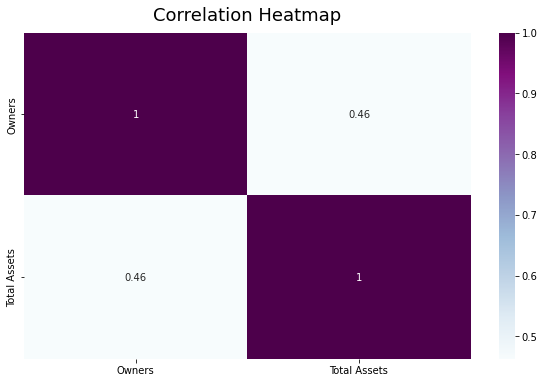

In [175]:
plt.figure(figsize=(10,6))
heatmap = sns.heatmap(df2.corr(), cmap="BuPu", annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

- Correlação forte! Não necessariamente um projeto terá mais proprietários quando se tem mais ativos, visto que um projeto pode ter muitos ativos e poucos donos - o que indicaria, muito provavelmente, que os ativos estão em um preço baixo, mas com expectativa de lucro. 

- Se o projeto tem muitos ativos e muitos donos, é muito provável que o preço esteja razoalvemente equilibrado na proporção entre os dois. Essa relação é espelhada na coluna owners_ratio.

###Há alguma relação entre o market cap e o total de ativos?

In [176]:
df3 = pd.DataFrame([df['Market Cap'], df['Total Assets']])

In [177]:
df3 = df3.transpose()

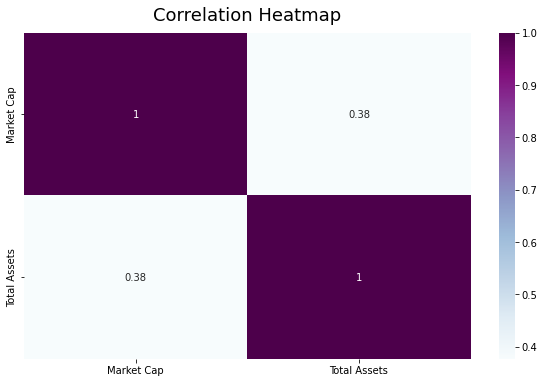

In [178]:
plt.figure(figsize=(10,6))
heatmap = sns.heatmap(df3.corr(), cmap="BuPu", annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

- Resposta: não é uma correlação forte, mas existe um indicativo. Não necessariamente quanto mais ativos, mais receita aquele projeto terá.

###Correlacionando o proprietários, total de ativos e market cap:

In [179]:
df4 = pd.DataFrame([df['Owners'], df['Total Assets'], df['Market Cap']])

In [180]:
df4 = df4.transpose()

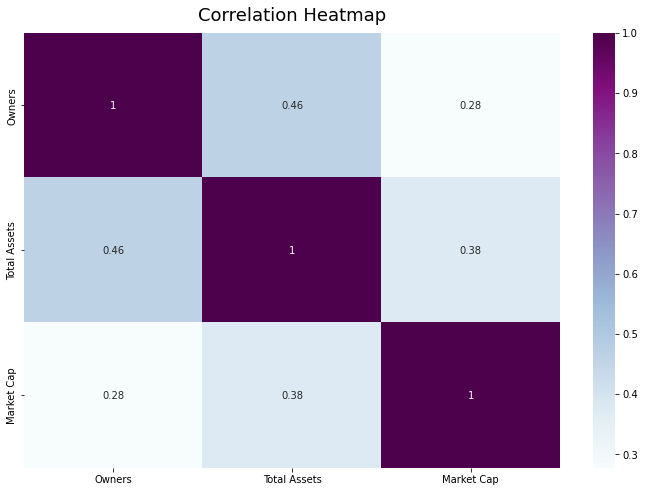

In [181]:
plt.figure(figsize=(12,8))
heatmap = sns.heatmap(df4.corr(), cmap="BuPu", annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

- Como podemos observar, a interação nova é entre proprietários e market cap

###O que o market cap e o owners indicam?

In [187]:
df5 = pd.DataFrame([df['Owners'], df['Market Cap']])
df5 = df5.transpose()

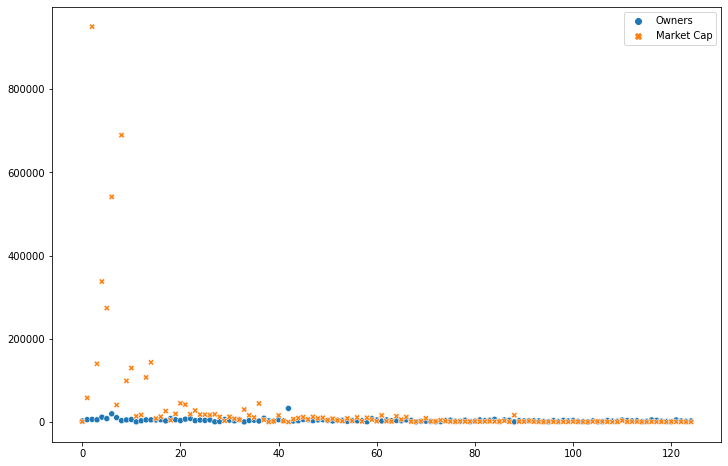

In [189]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df5)

##Conclusões


1. É importante notar que como essa análise é dinâmica, 
muitas vezes os números indicados serão completamente diferentes 
por questões de flutuação de mercado. Nesse sentido, tentei fazer 
uma análise das relações de forma a priori, respaldadas pelos 
projetos principais da opensea de fevereiro, daqui a uma semana ou 
um mês ou um ano serão completamente diferentes.

2. Os dados acerca do floor price estão concentrados por volta de 0 e 5 ETH. O que nos indica lançamentos baixos, exceto por alguns outliers discrepantes.

3. A conclusão é que o Market Cap se mantém estável de um modo geral para a maior partes dos projetos tirando alguns Outliers acima de 20.000, ou ainda, podemos  considerar que os Outliers se comprometem bastante acima do 3º Quartil (75%): 13587.1 ETH. Ainda mais quando se considera que a mediana é 2179 ETH, podemos entender que a maior parte dos projetos deve estar por volta desse valor.

4. Importante: Diante dos gráficos, conseguimos compreender que ainda existe uma 
boa dispersão acima de por volta de 3000 ETH de market cap. Os projetos acima disso são os que devem ter uma atenção interessante para um investidor.

- Os proprietários do NFTs obedecem uma métrica muito mais concisa. O que isso nos indica? 

5. O fato é que um proprietário pode ter muitos NFTs e não possuímos esse número somente com essa feature. No entanto,  o que podemos inferir é que os projetos que possuem muitos proprietários:Estão completamente vendidos ou quase completamente.Esses NFTs têm um preço baixo ou o projeto tem muita fama. Os projetos que têm poucos proprietários ou têm um preço alto ou têm pouco sucesso.

6. A média de totais de NFTs (total assets) dos projetos é 7796. A maior parte dos projetos, no entanto se concentra em 9409 ~ 10.000 NFTs.

7. No dia 10/02, encontrei nenhum market cap maior que a multiplicação entre floor price e market cap.Portanto, o que indica é que essa coluna não é verídica. O interessante é notar que isso baliza o investidor por baixo, sabemos que a receita do projeto é, no mínimo, o market cap indicado no dataset.

8. Não necessariamente um projeto terá mais proprietários quando se tem mais ativos, visto que um projeto pode ter muitos ativos e poucos donos - o que indicaria, muito provavelmente, que os ativos estão em um preço baixo, mas com expectativa de lucro.

9. Se o projeto tem muitos ativos e muitos donos, é muito provável que o preço esteja razoalvemente equilibrado na proporção entre os dois. Essa relação é espelhada na coluna owners_ratio.

#Esses pontos foram colhidos através da observação dos gráficos e dos parâmetros estatísticos. Eles auxiliam algumas coisas em relação as perguntas iniciais:
- Quais indicadores devo olhar para encontrar um possível sucesso com os dados que me foram dados?
- Existe alguma relação inerente a esses dados?
- Quais dados extrensícos ao dataset coletado devo considerar para não enviesar absolutamente minha análise?

1. Primeiro pergunta: Diante do que foi escolhido, e tomado como premissa, certamente o market cap é essencial. Percebemos também que o floor price é essencial para um investidor visto como a open sea e a coingecko (por consequência) o tomam como baliza mínima de valor. A quantidade de proprietários é essencial para compreendermos o quanto aquele projeto é atraente, no entanto, nada nos indica que quanto mais proprietários, mais valorizado é aquele projeto, para isso é preciso analisar em conjunto com o price floor e o market cap.

2. Como demonstrei, o market cap é associado ao price floor e a quantidade total de NFTs em um projeto (total assets). Também é interessante notar o owner ratio, que nos mostra o quanto aquele projeto tem em termos de proporção de proprietários e ativos do projeto e como isso é significativo para saber o quão populoso é um projeto. A partir disso, podemos balizar também pela média de NFTs de um projeto. Acredito que isso é interessante de se comparar, se determinado projeto tá acima ou baixo da média em relação à quantidade de NFTs ofertados e relacionar isso com o owner ratio.

3. Isso é um toque mais pessoal que o dataset não fornece de maneira alguma. O que podemos inferir do dataset é quais projetos valem a pena se aprofundar quanto a essa questão. Para além de questões puramente matemática e financeiras, a questão gira em torno de o quão aquele projeto é sustentável de um ponto de vista tecnológico e de constituição de comunidade.